- 什么是掩码张量？
  - 让另一个张量中的一些数值被遮掩
- 掩码张量的作用？
  - 防止未来信息被提前利用

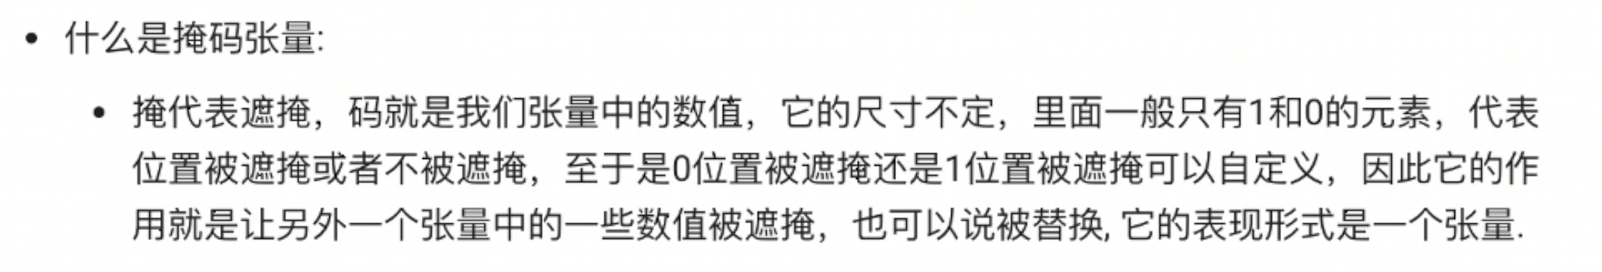
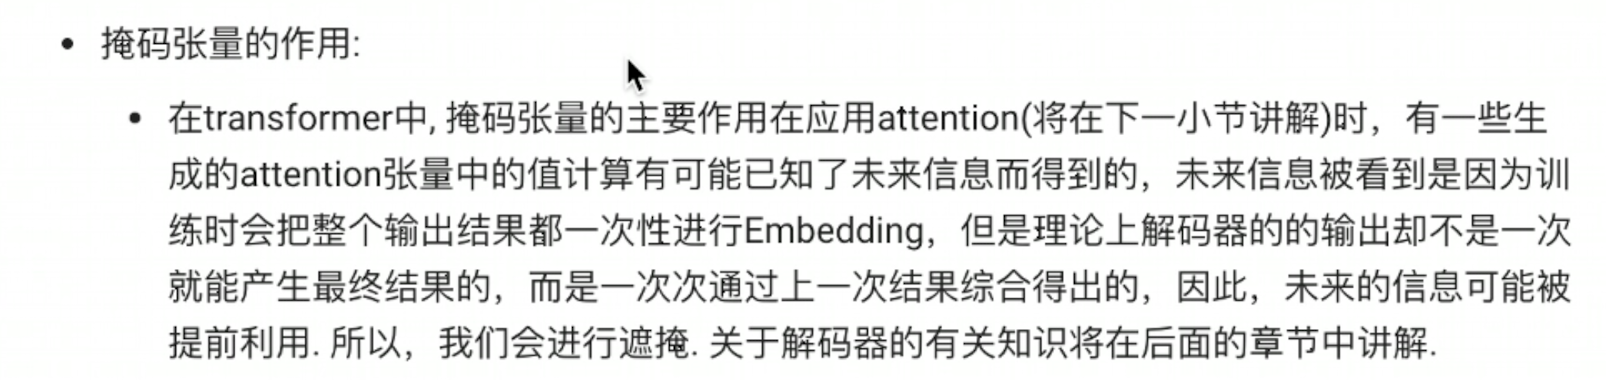

**生成掩码张量的代码分析**

In [1]:
import numpy as np
import torch

In [2]:
def subsequent_mask(size):
    '''生成向后遮掩的掩码张量，参数size是掩码张量最后两个维度的大小，它的最后两维形成一个方阵'''
    # 在函数中，首先定义掩码张量的形状
    attn_shape = (1,size,size)

    # 然后使用np.ones方法向这个形状中添加1元素，形成上三角阵，最后为了节约空间
    # 再使其中的数据类型变成无符号8位整形unit8
    subsequent_mask = np.triu(np.ones(attn_shape),k=1).astype('uint8')

    # 最后将numpy类型转化为torch中的tensor，内部做一个 1- 的操作，
    # 在这个其实是做了三角阵的反转，subsequent_mask中每个元素都会被1减
    # 如果是0，subsequent_mask中的该位置由0变成1
    # 如果是1，subsequent_mask中的该位置由1变成0
    return torch.from_numpy(1- subsequent_mask )


**np.triu演示**

u：是上三角阵，保留上面的元素

In [3]:
np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],k=-1)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 0,  8,  9],
       [ 0,  0, 12]])

结果解释：
- 1 5 9是主对角线 
- -1 表示下移一行 保留着元素

In [4]:
np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],k=0)
# 只保留主对角线第0对角的元素

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9],
       [0, 0, 0]])

In [6]:
np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],k=1)
# 保留对角线 斜线 上移1以后所有 的元素

array([[0, 2, 3],
       [0, 0, 6],
       [0, 0, 0],
       [0, 0, 0]])

**输入实例**

In [7]:
# 生成的掩码张量的最后两维的大小
size = 5

In [8]:
sm = subsequent_mask(size)
sm

tensor([[[1, 0, 0, 0, 0],
         [1, 1, 0, 0, 0],
         [1, 1, 1, 0, 0],
         [1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1]]], dtype=torch.uint8)